In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Importing The Libraries**

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### **Importing The CSV File**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/train (3).csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### **Data Preprocessing**

#### **Checking For NULL Values**

In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

#### **Droping The Irrelevant Columns**

In [7]:
df = df.drop(['id','qid1','qid2'],axis=1)
df.head(10)

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


#### **Taking Sample Of 20000 Data**

In [9]:
df = df.sample(8000,random_state=2)
df=df.reset_index(drop=True)
df.head(3)

,question1,question2,is_duplicate
0,Why is my life getting so complicated?,Why is life so complicated?,0
1,What is monetary policy.?,What is a clear explanation of monetary policy?,0
2,What should I do when I often feel bored and a...,What should I do when I feel bored?,1


#### **Checking Whether The data is balanced or not**

In [10]:
df['is_duplicate'].value_counts()

0    4972
1    3028
Name: is_duplicate, dtype: int64

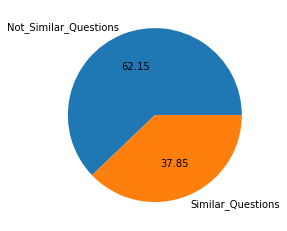

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['is_duplicate'].value_counts(), labels=['Not_Similar_Questions','Similar_Questions'],autopct="%0.2f")
plt.show()

## **Number Of Words In Each Question**

In [12]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,question1,question2,is_duplicate,q1_num_words,q2_num_words
0,Why is my life getting so complicated?,Why is life so complicated?,0,7,5
1,What is monetary policy.?,What is a clear explanation of monetary policy?,0,4,8
2,What should I do when I often feel bored and a...,What should I do when I feel bored?,1,11,8
3,What is the best soccer team nowadays?,What is the best soccer team?,0,7,6
4,When will I look like an adult?,When will I feel like an adult?,0,7,7


### **Common Words Between Two Questions**

In [13]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

df['word_common'] = df.apply(common_words, axis=1)
df.head()

,question1,question2,is_duplicate,q1_num_words,q2_num_words,word_common
0,Why is my life getting so complicated?,Why is life so complicated?,0,7,5,5
1,What is monetary policy.?,What is a clear explanation of monetary policy?,0,4,8,3
2,What should I do when I often feel bored and a...,What should I do when I feel bored?,1,11,8,6
3,What is the best soccer team nowadays?,What is the best soccer team?,0,7,6,5
4,When will I look like an adult?,When will I feel like an adult?,0,7,7,6


## **Total Number Of Words**

In [14]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

df['word_total'] = df.apply(total_words, axis=1)
df.head()

,question1,question2,is_duplicate,q1_num_words,q2_num_words,word_common,word_total
0,Why is my life getting so complicated?,Why is life so complicated?,0,7,5,5,12
1,What is monetary policy.?,What is a clear explanation of monetary policy?,0,4,8,3,12
2,What should I do when I often feel bored and a...,What should I do when I feel bored?,1,11,8,6,17
3,What is the best soccer team nowadays?,What is the best soccer team?,0,7,6,5,13
4,When will I look like an adult?,When will I feel like an adult?,0,7,7,6,14


### **Text Preprocessing**

In [15]:
for i in range(0,10):
    print(df['question1'][i])

Why is my life getting so complicated?
What is monetary policy.?
What should I do when I often feel bored and aimless?
What is the best soccer team nowadays?
When will I look like an adult?
Can I take NyQuil and Sudafed at the same time?
Why when I urinate does my urine sometimes come out in two directions simultaneously?
What does money manager do?
What Race would a person with black hair, blue eyes and white skin most likely be?
What is the salary offered to a SDE-I, SDE-II and SDE-III in OLa?


In [16]:
for i in range(0,10):
    print(df['question2'][i])

Why is life so complicated?
What is a clear explanation of monetary policy?
What should I do when I feel bored?
What is the best soccer team?
When will I feel like an adult?
What are the dangers of taking Valium and Percocet at the same time?
Is protein in urine bad?
What are money manager investors?
Is black hair, blue eyes and white skin a rare combination?
What is the salary offered to a SDE-I, SDE-II and SDE-III in Flipkart?


#### **Converting The Text Into Lowercase**

In [17]:
df['question1']= df['question1'].str.lower()
df['question2']= df['question2'].str.lower()

In [18]:
for i in range(0,10):
    print(df['question1'][i])

why is my life getting so complicated?
what is monetary policy.?
what should i do when i often feel bored and aimless?
what is the best soccer team nowadays?
when will i look like an adult?
can i take nyquil and sudafed at the same time?
why when i urinate does my urine sometimes come out in two directions simultaneously?
what does money manager do?
what race would a person with black hair, blue eyes and white skin most likely be?
what is the salary offered to a sde-i, sde-ii and sde-iii in ola?


In [19]:
for i in range(0,10):
    print(df['question2'][i])

why is life so complicated?
what is a clear explanation of monetary policy?
what should i do when i feel bored?
what is the best soccer team?
when will i feel like an adult?
what are the dangers of taking valium and percocet at the same time?
is protein in urine bad?
what are money manager investors?
is black hair, blue eyes and white skin a rare combination?
what is the salary offered to a sde-i, sde-ii and sde-iii in flipkart?


#### **Removing The Special Characters**

In [20]:
import re

In [21]:
def Remove_specialCharacters_patterns(q):

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    return q

In [22]:
Remove_specialCharacters_patterns('We can get 70% profit from it')

'We can get 70 percent profit from it'

In [23]:
df['question1'] = df['question1'].apply(Remove_specialCharacters_patterns)
df['question2'] = df['question2'].apply(Remove_specialCharacters_patterns)

#### **Removing The Short Forms**

In [24]:
for i in range(0,20):
    print(df['question1'][i])

why is my life getting so complicated?
what is monetary policy.?
what should i do when i often feel bored and aimless?
what is the best soccer team nowadays?
when will i look like an adult?
can i take nyquil and sudafed at the same time?
why when i urinate does my urine sometimes come out in two directions simultaneously?
what does money manager do?
what race would a person with black hair, blue eyes and white skin most likely be?
what is the salary offered to a sde-i, sde-ii and sde-iii in ola?
what are covalent bonds? how do they occur?
is dhoni a disgrace for cricket?
how often is google maps updated?
what should i do on my girlfriend's birthday to make her feel special when i’m far away from her?
what does 심하잖아 mean?
is it possible to love more than one person at the same time?
what are good movie recommendation engines?
what is the difference between informal and formal sectors as against organised and unorganised sectors?
how much are youtubers paid a month?
how does someone find

In [25]:
def preprocess(q):

    contractions = {  
    "ain't": "am not",
    "aren't": "are not", 
    "can't": "can not",
     "can't've": "can not have",
     "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not", 
    "doesn't": "does not",
     "don't": "do not",
     "hadn't": "had not",
     "hadn't've": "had not have", 
    "hasn't": "has not", 
    "haven't": "have not", 
    "he'd": "he would", 
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
     "mayn't": "may not", 
    "might've": "might have",
     "mightn't": "might not",
     "mightn't've": "might not have",
     "must've": "must have",
     "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not"
    ,"shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    return q

In [26]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [27]:
for i in range(0,20):
    print(df['question1'][i])

why is my life getting so complicated?
what is monetary policy.?
what should i do when i often feel bored and aimless?
what is the best soccer team nowadays?
when will i look like an adult?
can i take nyquil and sudafed at the same time?
why when i urinate does my urine sometimes come out in two directions simultaneously?
what does money manager do?
what race would a person with black hair, blue eyes and white skin most likely be?
what is the salary offered to a sde-i, sde-ii and sde-iii in ola?
what are covalent bonds? how do they occur?
is dhoni a disgrace for cricket?
how often is google maps updated?
what should i do on my girlfriend's birthday to make her feel special when i’m far away from her?
what does 심하잖아 mean?
is it possible to love more than one person at the same time?
what are good movie recommendation engines?
what is the difference between informal and formal sectors as against organised and unorganised sectors?
how much are youtubers paid a month?
how does someone find

#### **Removing Punctuations**

In [28]:
import string
exclude =string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def remove_punct(text):
    return text.translate(str.maketrans('','',exclude))

In [30]:
df['question1'] = df['question1'].apply(remove_punct)
df['question2'] = df['question2'].apply(remove_punct)

In [31]:
for i in range(0,20):
    print(df['question1'][i])

why is my life getting so complicated
what is monetary policy
what should i do when i often feel bored and aimless
what is the best soccer team nowadays
when will i look like an adult
can i take nyquil and sudafed at the same time
why when i urinate does my urine sometimes come out in two directions simultaneously
what does money manager do
what race would a person with black hair blue eyes and white skin most likely be
what is the salary offered to a sdei sdeii and sdeiii in ola
what are covalent bonds how do they occur
is dhoni a disgrace for cricket
how often is google maps updated
what should i do on my girlfriends birthday to make her feel special when i’m far away from her
what does 심하잖아 mean
is it possible to love more than one person at the same time
what are good movie recommendation engines
what is the difference between informal and formal sectors as against organised and unorganised sectors
how much are youtubers paid a month
how does someone find a mentor


#### **Removing StopWords**

In [32]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

exclude=stopwords.words('english')
exclude

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
def Remove_StopWords(text): 
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in exclude]
    filtered_sentence = []
  
    for w in word_tokens:
        if w not in exclude:
            filtered_sentence.append(w)
    return " ".join(filtered_sentence)

In [35]:
df['question1'] = df['question1'].apply(Remove_StopWords)
df['question2'] = df['question2'].apply(Remove_StopWords)

In [36]:
for i in range(0,20):
    print(df['question1'][i])

life getting complicated
monetary policy
often feel bored aimless
best soccer team nowadays
look like adult
take nyquil sudafed time
urinate urine sometimes come two directions simultaneously
money manager
race would person black hair blue eyes white skin likely
salary offered sdei sdeii sdeiii ola
covalent bonds occur
dhoni disgrace cricket
often google maps updated
girlfriends birthday make feel special ’ far away
심하잖아 mean
possible love one person time
good movie recommendation engines
difference informal formal sectors organised unorganised sectors
much youtubers paid month
someone find mentor


#### **Stemming**

In [37]:
from nltk.stem.porter import PorterStemmer

In [38]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in word_tokenize(text)])

In [39]:
df['question1'] = df['question1'].apply(stem_words)
df['question2'] = df['question2'].apply(stem_words)

#### **Preprocessed Text**

In [40]:
df['question1']

0                                        life get complic
1                                         monetari polici
2                                 often feel bore aimless
3                                best soccer team nowaday
4                                         look like adult
                              ...                        
7995                      attend mit purdu aerospac engin
7996                                air purifi remov pm25
7997                                  care rio olymp 2016
7998                  billi meier ufo contact legit fraud
7999    creat recur appoint occur everi third thursday...
Name: question1, Length: 8000, dtype: object

In [41]:
df['question2']

0                                            life complic
1                            clear explan monetari polici
2                                               feel bore
3                                        best soccer team
4                                         feel like adult
                              ...                        
7995                    sr sap fico system analyst salari
7996                pm25 particul matter pollut new delhi
7997          rio olymp 2016 interest fact rio olymp 2016
7998                      ufo unidentifi fli object exist
7999    vba macro outlook want run regular schedul lik...
Name: question2, Length: 8000, dtype: object

#### **Bag Of Words Embedding**

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(df['question1']) + list(df['question2'])

In [43]:
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

#### **Formation Of The DataFrame**

In [44]:
temp_df1 = pd.DataFrame(q1_arr, index= df.index)
temp_df2 = pd.DataFrame(q2_arr, index= df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(8000, 6000)

In [45]:
temp_df['q1_num_words'] = df['q1_num_words']
temp_df['q2_num_words'] = df['q2_num_words']
temp_df['word_common'] = df['word_common']
temp_df['word_total'] = df['word_total']
temp_df['is_duplicate'] = df['is_duplicate']
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2995,2996,2997,2998,2999,q1_num_words,q2_num_words,word_common,word_total,is_duplicate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,5,5,12,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,8,3,12,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,11,8,6,17,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,6,5,13,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,7,6,14,0


#### **Train Test Split**

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:, :-1].values,temp_df.iloc[:, -1].values,test_size=0.25,random_state=0)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 6004)
(2000, 6004)
(6000,)
(2000,)


#### **Support Vector Machine**

In [48]:
from sklearn.svm import SVC

In [49]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[1 1]
 [1 1]
 [1 0]
 ...
 [0 0]
 [1 0]
 [0 0]]


#### **Confusion Matrix, Precision and Recall**

In [52]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(cm)
print(Precision)
print(Recall)

[[977 242]
 [374 407]]
0.6271186440677966
0.5211267605633803


#### **Accuracy**

In [53]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)

0.692


#### **Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred = rf.predict(X_test)

#### **Confusion Matrix, Precision and Recall**

In [57]:
cm = confusion_matrix(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(cm)
print(Precision)
print(Recall)

[[1083  136]
 [ 387  394]]
0.7433962264150943
0.5044814340588989


#### **Accuracy**

In [58]:
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)

0.7385


### **Artifical Neural Network**

In [59]:
import tensorflow as tf

In [60]:
ann = tf.keras.models.Sequential()

In [61]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [62]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [63]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [64]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 60)

Epoch 1/60
188/188 [==============================] - 3s 5ms/step - loss: 0.6354 - accuracy: 0.6255
Epoch 2/60
188/188 [==============================] - 1s 5ms/step - loss: 0.5509 - accuracy: 0.6743
Epoch 3/60
188/188 [==============================] - 1s 5ms/step - loss: 0.4887 - accuracy: 0.7567
Epoch 4/60
188/188 [==============================] - 1s 5ms/step - loss: 0.4421 - accuracy: 0.7998
Epoch 5/60
188/188 [==============================] - 1s 5ms/step - loss: 0.4032 - accuracy: 0.8300
Epoch 6/60
188/188 [==============================] - 1s 5ms/step - loss: 0.3643 - accuracy: 0.8575
Epoch 7/60
188/188 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8817
Epoch 8/60
188/188 [==============================] - 1s 4ms/step - loss: 0.3009 - accuracy: 0.8960
Epoch 9/60
188/188 [==============================] - 1s 4ms/step - loss: 0.2722 - accuracy: 0.9128
Epoch 10/60
188/188 [==============================] - 1s 5ms/step - loss: 0.2469 - accuracy: 0.9243